<b>Problem 1.</b> In this question we investigate the behaviour of a two-layer neural network on two-dimensional toy data. If $\sigma$ is the logistic function, then the two-layer network functions by producing a vector of intermediate responses,
$$
z_j = \sigma ( w_j^T \phi (x) )
$$
and then predicting the class labels by
$$
p (y =  1 \vert z, w_0 ) = \sigma ( w_0^T \phi_0 (z) )
$$
where the weights $\{ w_0, w_1, \dots, w_J \}$ are the parameters to be fit.  

The features $\phi$ and $\phi_0$ that we use will incorporate a bias term:
$$
\phi_0 (z) := (1, z_{1} , \dots z_J )^T, \quad \phi(x) := (1, x_1, \dots, x_n )^T
$$
We use gradient descent algorithms to fit the neural net to the training data by minimizing the objective function,
$$
J(w) = \sum_{n=1}^N - \log p (y_n | x_n, w) + \lambda ||w||_2^2.
$$
For all questions we will take $\lambda = 10^{-8}$.

<b>1.a)</b> Implement a two-layer neural network as described above.  Fit a neural network with $J=1$ hidden units to the ToyDataA.mat training data.  Run the optimization from $10$ random initial guesses.  Report accuracy on the training data and the objective function for the parameters that yield the best objective function value across all initializations.  Plot the decision boundary.

In [2]:
import numpy as np
from scipy.io import loadmat
import hw7
import imp

The accuracy of the best fit on the training data is: 0.7500
The best value of the objective function is: 0.4774


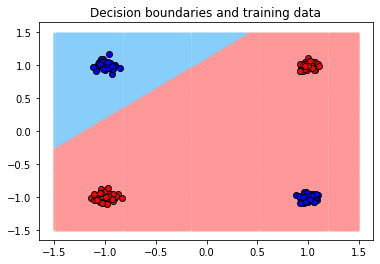

In [23]:
imp.reload(hw7)
dataA = loadmat('ToyDataA.mat')
X = dataA['Xtrain']
y = dataA['ytrain'].flatten()
obj = np.zeros(10)
params = {}
tL = hw7.twoLayer()

for i in range(10):
    tL.fit(X, y, J=1, C=0.00000001)
    obj[i]=tL.obj
    params[i] = tL.w
i = np.argmin(obj)
tL.w = params[i]
print('The accuracy of the best fit on the training data is: '+'{:.4f}'.format( tL.acc(X, y)))
print('The best value of the objective function is: '+'{:.4f}'.format( obj[i]))
tL.plot(X, y)

<b>1.b)</b> Now repeat the previous question with $J=2$.  Report the training accuracy for the parameters with the best and worst objective functions and plot their decision boundaries.

The accuracy of the best fit on the training data is:  1.0
The best value of the objective function is: 5.012018787050465e-07


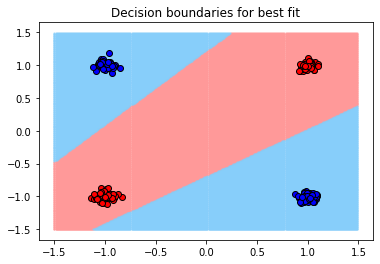

The accuracy of the best worst fit on the training data is:  0.75
The worst value of the objective function is: 0.3466


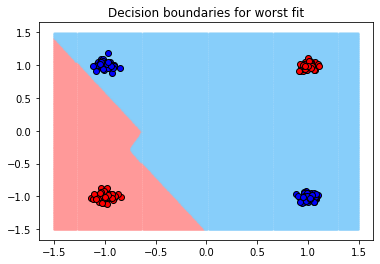

In [21]:
dataA = loadmat('ToyDataA.mat')
X = dataA['Xtrain']
y = dataA['ytrain'].flatten()
obj = np.zeros(10)
params = {}
tL = hw7.twoLayer()

obj = np.zeros(10)
params = {}
acc= {}
tL = hw7.twoLayer()

for i in range(10):
    tL.fit(X, y, J=2, C=0.00000001)
    obj[i]=tL.obj
    params[i] = tL.w
    acc[i] = tL.acc(X, y)
i = np.argmin(obj)
tL.w = params[i]
print('The accuracy of the best fit on the training data is: ', acc[i])
print('The best value of the objective function is:', obj[i])
tL.plot(X, y, title='Decision boundaries for best fit')

i = np.argmax(obj)
tL.w = params[i]
print('The accuracy of the best worst fit on the training data is: ', acc[i])
print('The worst value of the objective function is: '+'{:.4f}'.format( obj[i]))
tL.plot(X, y, title='Decision boundaries for worst fit')

<b>1.c)</b> Fit neural networks with $J=2, 3, 4, 5, 10, 20$ hidden units to the ToyDataB.mat data. Keep only the best fit of 10 random initializations for each value of $J$.  Create plots of the resulting decision boundaries for each value of J.  Report training accuracy.

Training accuracy for best fit with J= 2 : 0.82


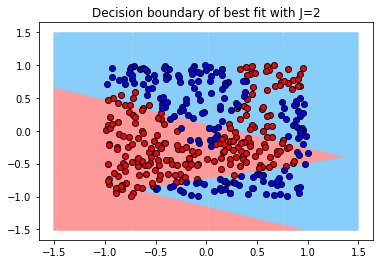

Training accuracy for best fit with J= 3 : 0.8875


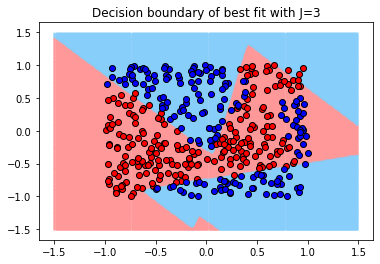

Training accuracy for best fit with J= 4 : 0.97


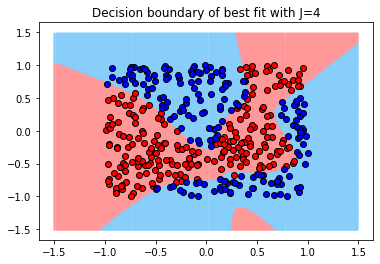

Training accuracy for best fit with J= 5 : 0.985


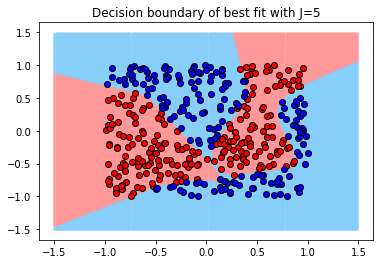

Training accuracy for best fit with J= 10 : 1.0


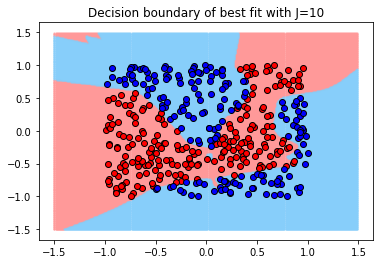

Training accuracy for best fit with J= 20 : 1.0


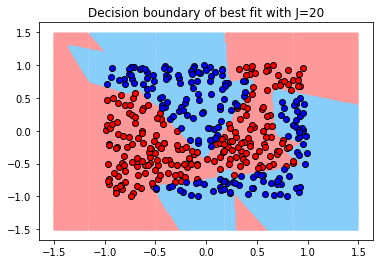

In [22]:
dataB = loadmat('ToyDataB.mat')
X = dataB['Xtrain']
y = dataB['ytrain'].flatten()

for J in [2, 3, 4, 5, 10, 20]:
    obj = np.zeros(10)
    params = {}
    tL = hw7.twoLayer()
    for i in range(10):
        tL.fit(X, y, J=J, C=0.00000001)
        params[i] = tL.w
        obj[i] = tL.obj
    i = np.argmin(obj)
    tL.w = params[i]
    print('Training accuracy for best fit with J=', J, ':', tL.acc(X, y))
    tL.plot(X, y, title='Decision boundary of best fit with J='+str(J))

<b>Problem 2</b>. In this question we explore Gaussian process classification on a dataset of images of pedestrians from Daimler-Chrysler.  We will compare two sets of features - raw intensity values and a preprocessed dataset, the so-called histogram-oriented-gradient features (HOG).

For each feature set we consider two kernels, the linear kernel:
$$
k(x, y) = \alpha (1 + x^T y )
$$
and the squared exponential kernel:
$$
k (x, y) = \sigma^2 \exp \left[- \frac{ ||x-y||^2}{ 2 \ell^2 } \right]
$$

In this homework we will use the Gaussian process Matlab toolbox which is distribued as part of the pmtk3 Matlab toolbox.  The two covariances are supported by covLINone and covSEiso.  We will use the Laplace approximation to implement binary GP features, which is supported by the toolbox.  

(Note: as I am completing this problem set in Python instead of Matlab, I used the sklearn GPC method instead of the pmtk3 which are roughly equivalent)

Hyperparameters will be chosen by maximizing the marginal likelihood; due to the non-convexity we choose several initial guesses for the hyperparameters and compare.

<b>2.a)</b> Load the intensity dataset.  For a Gaussian Process Classifier using a linear kernel, find the optimal hyperparameter $\alpha$ with initial guess $\log \alpha = -20$.  Report the optimal hyperparameter and the error rate on the test data.

In [10]:
import numpy as np
from scipy.io import loadmat
from sklearn.gaussian_process import GaussianProcessClassifier
import imp
import hw7
imp.reload(hw7)
intensity = loadmat('intensity_features.mat')
hog = loadmat('hog_features.mat')
from sklearn.gaussian_process.kernels import RBF, DotProduct, ConstantKernel, Product

In [25]:
alpha_init = np.exp(-20.0)
kernelLin = Product(ConstantKernel(constant_value = alpha_init, constant_value_bounds = (np.power(10.0, -20), np.power(10.0, 20))), DotProduct(sigma_0=1.0, sigma_0_bounds = (0.001, 1000.0)))
gC = GaussianProcessClassifier(kernel = kernelLin, optimizer=hw7.optimizer)
gC.fit(intensity['x_train']+0.0, intensity['y_train'].flatten())
y = gC.predict(intensity['x_train']+0.0)
print('Train accuracy: '+'{:.4f}'.format(np.sum(y==intensity['y_train'].flatten()) / len(y)))
y = gC.predict(intensity['x_test']+0.0)
print('Test accuracy: '+'{:.4f}'.format(np.sum(y==intensity['y_test'].flatten()) / len(y)))
print('Optimal alpha:', gC.kernel_.get_params()['k1__constant_value'])

Train accuracy: 0.9367
Test accuracy: 0.8000
Optimal alpha: 6.541780233953061e-06


<b>1.b)</b> Repeat part (a) with initial guess $\log \alpha = 5$.  

In [24]:
alpha_init = np.exp(5)
kernelLin = Product(ConstantKernel(constant_value = alpha_init, constant_value_bounds = (np.power(10.0, -25), np.power(10.0, 20))), DotProduct(sigma_0=1.0, sigma_0_bounds = (1.0, 1.0)))
gC = GaussianProcessClassifier(kernel = kernelLin, optimizer=hw7.optimizer)
gC.fit(intensity['x_train']+0.0, intensity['y_train'].flatten())
y = gC.predict(intensity['x_train']+0.0)
print('Train accuracy: '+'{:.4f}'.format( np.sum(y==intensity['y_train'].flatten()) / len(y)))
y = gC.predict(intensity['x_test']+0.0)
print('Test accuracy: '+'{:.4f}'.format(np.sum(y==intensity['y_test'].flatten()) / len(y)))
print('Optimal alpha:', gC.kernel_.get_params()['k1__constant_value'])

Train accuracy: 0.9733
Test accuracy: 0.7683
Optimal alpha: 1.1976967822095764e-05


<b>1.c)</b> Repeat (a-b) using the HOG data set.  

For initial alpha $\log \alpha = -20$:

In [26]:
alpha_init = np.exp(-20.0)
kernelLin = Product(ConstantKernel(constant_value = alpha_init, constant_value_bounds = (np.power(10.0, -20), np.power(10.0, 20))), DotProduct(sigma_0=1.0, sigma_0_bounds = (0.001, 1000.0)))
gC = GaussianProcessClassifier(kernel = kernelLin, optimizer=hw7.optimizer)
gC.fit(hog['x_train']+0.0, hog['y_train'].flatten())
y = gC.predict(hog['x_train']+0.0)
print('Train accuracy: '+'{:.4f}'.format( np.sum(y==hog['y_train'].flatten()) / len(y)))
y = gC.predict(hog['x_test']+0.0)
print('Test accuracy: '+'{:.4f}'.format( np.sum(y==hog['y_test'].flatten()) / len(y)))
print('Optimal alpha: '+'{:.4f}'.format(gC.kernel_.get_params()['k1__constant_value']))

Train accuracy: 1.0000
Test accuracy: 0.8750
Optimal alpha: 3.8313


For initial $\log \alpha = 5$:

In [28]:
alpha_init = np.exp(5)
kernelLin = Product(ConstantKernel(constant_value = alpha_init, constant_value_bounds = (np.power(10.0, -20), np.power(10.0, 20))), DotProduct(sigma_0=1.0, sigma_0_bounds = (0.001, 1000.0)))
gC = GaussianProcessClassifier(kernel = kernelLin, optimizer=hw7.optimizer)
gC.fit(hog['x_train']+0.0, hog['y_train'].flatten())
y = gC.predict(hog['x_train']+0.0)
print('Train accuracy: '+'{:.4f}'.format(np.sum(y==hog['y_train'].flatten()) / len(y)))
y = gC.predict(hog['x_test']+0.0)
print('Test accuracy: '+'{:.4f}'.format(np.sum(y==hog['y_test'].flatten()) / len(y)))
print('Optimal alpha: '+'{:.4f}'.format(gC.kernel_.get_params()['k1__constant_value']))

Train accuracy: 1.0000
Test accuracy: 0.8750
Optimal alpha: 3.8313


<b>1.d)</b> Repeat (a) with the intensity dataset and the squared exponential function kernel.  Let the initial guess be $(\ell, \sigma^2 ) = (10^{10}, 10^{3} )$

In [31]:
alpha_init = np.power(10.0, 3.0)
ell_init = np.power(10.0, 10.0)

kernelRBF = Product(ConstantKernel(constant_value = alpha_init, constant_value_bounds = (np.power(10.0, -20.0), np.power(10.0, 20.0))), RBF(length_scale = ell_init, length_scale_bounds = (np.power(10.0, -20.0), np.power(10.0, 20.0))))

gC = GaussianProcessClassifier(kernel = kernelRBF)#, optimizer=hw7.optimizer)
gC.fit(intensity['x_train']+0.0, intensity['y_train'].flatten())
y = gC.predict(intensity['x_train']+0.0)
print('Train accuracy: '+'{:.4f}'.format(np.sum(y==intensity['y_train'].flatten()) / len(y)))
y = gC.predict(intensity['x_test']+0.0)
print('Test accuracy: '+'{:.4f}'.format(np.sum(y==intensity['y_test'].flatten()) / len(y)))

print('Optimal constant value:', gC.kernel_.get_params()['k1__constant_value'])
print('Optimal ell:', gC.kernel_.get_params()['k2__length_scale'])

Train accuracy: 0.5167
Test accuracy: 0.5000
Optimal constant value: 9.999999999999992e-21
Optimal ell: 12380452518.241365


<b>1.e)</b> Repeat (d) with initial guess $( \ell, \sigma^2 ) = ( 10^1, 10^3 )$.

In [32]:
alpha_init = np.power(10.0, 3.0)
ell_init = np.power(10.0, 1.0)

kernelRBF = Product(ConstantKernel(constant_value = alpha_init, constant_value_bounds = (np.power(10.0, -20.0), np.power(10.0, 20.0))), RBF(length_scale = ell_init, length_scale_bounds = (np.power(10.0, -20.0), np.power(10.0, 20.0))))

gC = GaussianProcessClassifier(kernel = kernelRBF, optimizer=hw7.optimizer)
gC.fit(intensity['x_train']+0.0, intensity['y_train'].flatten())
y = gC.predict(intensity['x_train']+0.0)
print('Train accuracy: '+'{:.4f}'.format(np.sum(y==intensity['y_train'].flatten()) / len(y)))
y = gC.predict(intensity['x_test']+0.0)
print('Test accuracy: '+'{:.4f}'.format(np.sum(y==intensity['y_test'].flatten()) / len(y)))

print('Optimal constant value:', gC.kernel_.get_params()['k1__constant_value'])
print('Optimal ell:', gC.kernel_.get_params()['k2__length_scale'])


Train accuracy: 1.0000
Test accuracy: 0.5100
Optimal constant value: 5.730243903909597e-05
Optimal ell: 10.000000000000002


<b>1.f)</b> Repeat (d-e) with the HOG dataset

initial guess: $(\ell, \sigma^2) = (10^{10}, 10^{3})$

In [34]:
alpha_init = np.power(10.0, 3.0)
ell_init = np.power(10.0, 10.0)

kernelRBF = Product(ConstantKernel(constant_value = alpha_init, constant_value_bounds = (np.power(10.0, -20.0), np.power(10.0, 20.0))), RBF(length_scale = ell_init, length_scale_bounds = (np.power(10.0, -20.0), np.power(10.0, 20.0))))

gC = GaussianProcessClassifier(kernel = kernelRBF, optimizer=hw7.optimizer)
gC.fit(hog['x_train']+0.0, hog['y_train'].flatten())
y = gC.predict(hog['x_train']+0.0)
print('Train accuracy: '+'{:.4f}'.format(np.sum(y==hog['y_train'].flatten()) / len(y)))
y = gC.predict(hog['x_test']+0.0)
print('Test accuracy: '+'{:.4f}'.format(np.sum(y==hog['y_test'].flatten()) / len(y)))

print('Optimal constant value:', gC.kernel_.get_params()['k1__constant_value'])
print('Optimal ell:', gC.kernel_.get_params()['k2__length_scale'])


Train accuracy: 0.5167
Test accuracy: 0.5000
Optimal constant value: 9.999999999999992e-21
Optimal ell: 10000001142.387054


initial guess: $(\ell, \sigma^2) = (10^{1}, 10^{3})$

In [35]:
alpha_init = np.power(10.0, 3.0)
ell_init = np.power(10.0, 1.0)

kernelRBF = Product(ConstantKernel(constant_value = alpha_init, constant_value_bounds = (np.power(10.0, -20.0), np.power(10.0, 20.0))), RBF(length_scale = ell_init, length_scale_bounds = (np.power(10.0, -20.0), np.power(10.0, 20.0))))

gC = GaussianProcessClassifier(kernel = kernelRBF, optimizer=hw7.optimizer)
gC.fit(hog['x_train']+0.0, hog['y_train'].flatten())
y = gC.predict(hog['x_train']+0.0)
print('Train accuracy: '+'{:.4f}'.format(np.sum(y==hog['y_train'].flatten()) / len(y)))
y = gC.predict(hog['x_test']+0.0)
print('Test accuracy: '+'{:.4f}'.format(np.sum(y==hog['y_test'].flatten()) / len(y)))

print('Optimal constant value:', gC.kernel_.get_params()['k1__constant_value'])
print('Optimal ell:', gC.kernel_.get_params()['k2__length_scale'])

Train accuracy: 1.0000
Test accuracy: 0.8833
Optimal constant value: 248.5027336513923
Optimal ell: 8.1199288855451
